# K-Nearest Neighbors (KNN)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Enter relevant column numbers
data = pd.read_csv('Social_Network_Ads.csv')
X = data.iloc[: , [2,3]].values
y = data.iloc[: , -1].values

In [3]:
# Split train-test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [4]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

c:\users\berk_\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
# Fitting model to the train set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7, weights='uniform', metric = 'minkowski', p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [10]:
# Predicting the test set results
y_pred = classifier.predict(X_test)

In [11]:
# Making the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
pd.DataFrame(cm)

,0,1
0,64,4
1,3,29


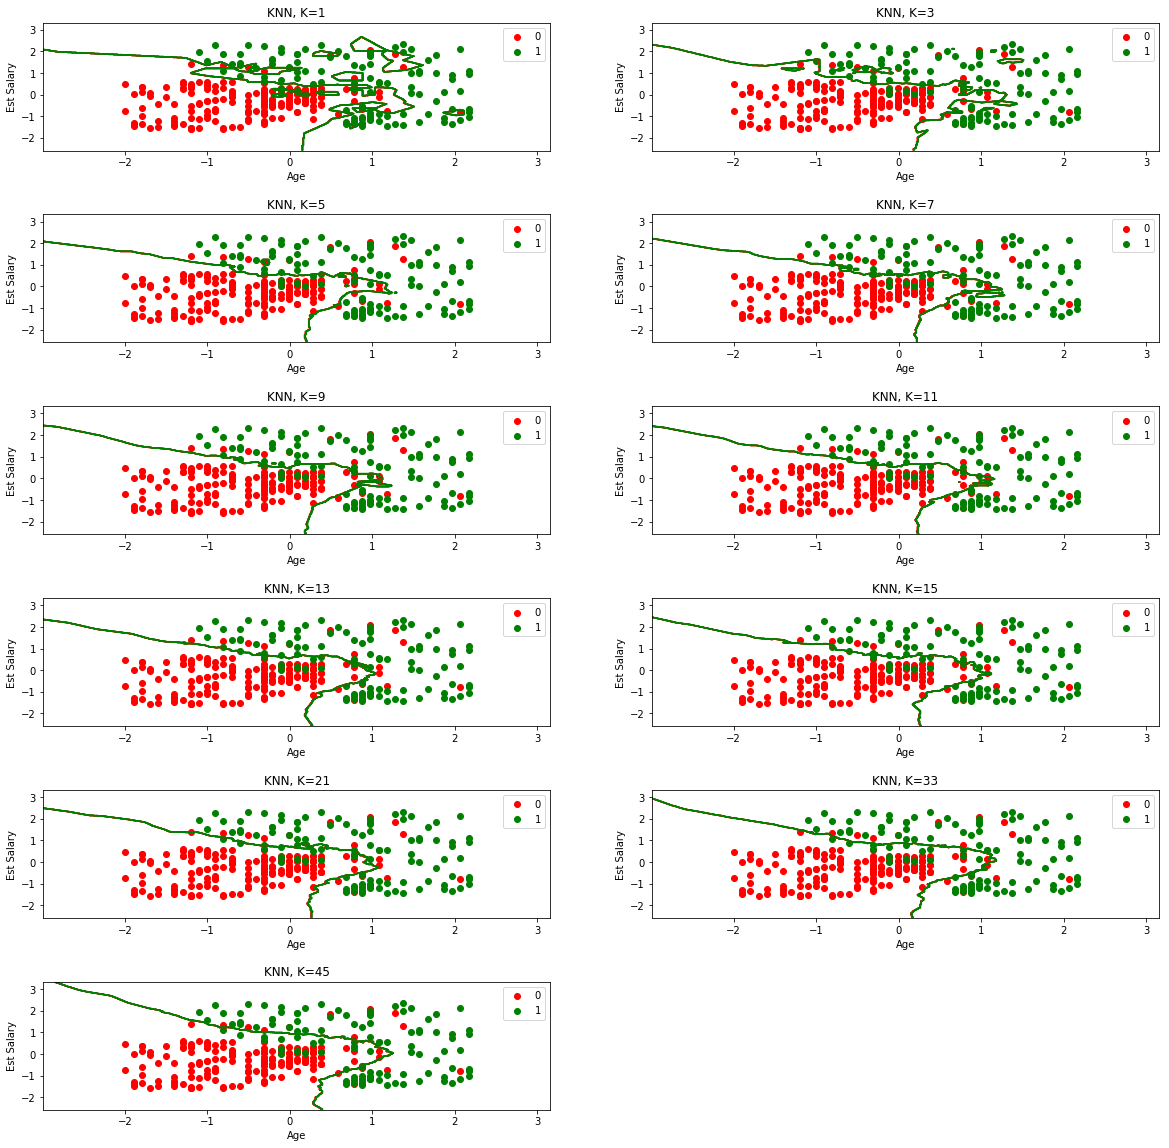

In [15]:
#Visualizing the KNN training set results

from matplotlib.colors import ListedColormap
f = plt.figure(figsize=(20,20))
h = 1
plt.subplots_adjust(hspace=.5)
for a in [1,3,5,7,9,11,13,15,21,33,45]:
    X_set, y_set = X_train, y_train
    classifier = KNeighborsClassifier(n_neighbors = a, weights='uniform', metric = 'minkowski', p=2)
    classifier.fit(X_train, y_train)
    X1 , X2 = np.meshgrid(np.arange(start = X_set[: , 0].min() - 1, stop = X_set[: , 0].max() + 1, step = 0.01),
                          np.arange(X_set[: , 1].min() -1, X_set[:, 1].max()  +1, 0.01))
    f.add_subplot(6,2,h)
    plt.contour(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha = 1, cmap = ListedColormap(('red','green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i,j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j , 0], X_set[y_set == j, 1],
                   c = ListedColormap(('red','green'))(i), label = j)
    plt.title("KNN, K={}".format(a))
    plt.xlabel('Age')
    plt.ylabel('Est Salary')
    plt.legend()
    h += 1
plt.show()

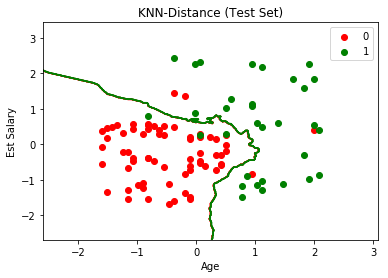

In [49]:
#Visualizing the KNN test set results

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1 , X2 = np.meshgrid(np.arange(start = X_set[: , 0].min() - 1, stop = X_set[: , 0].max() + 1, step = 0.01), #returns coordinate matrices
                      np.arange(X_set[: , 1].min() -1, X_set[:, 1].max()  +1, 0.01))
plt.contour(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 1, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j , 0], X_set[y_set == j, 1],
               c = ListedColormap(('red','green'))(i), label = j)
plt.title('KNN-Distance (Test Set)')
plt.xlabel('Age')
plt.ylabel('Est Salary')
plt.legend()
plt.show()

In [51]:
import math
math.sqrt(120)

10.954451150103322

In [25]:
classifier.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 45,
 'p': 2,
 'weights': 'uniform'}

In [21]:
params = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12],
 'weights': ['uniform',"distance"]}

In [22]:
from sklearn.grid_search import GridSearchCV
gs = GridSearchCV(classifier, params)

In [23]:
gs.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=45, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [24]:
gs.best_params_

{'n_neighbors': 5, 'weights': 'uniform'}

In [26]:
gs.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [30]:
gs.score(X_test,y_test)

0.93